In [0]:
try:
  %tensorflow_version 2.x
except:
  pass

import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from matplotlib import style
from tensorflow import keras
from tensorflow.keras import layers

style.use('ggplot')
print(tf.__version__)

2.0.0


### Get the MPG-Data
Data source : UCI Machine Learning Repository

In [0]:
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

32768/30286 [================================] - 0s 1us/step


'/root/.keras/datasets/auto-mpg.data'

In [0]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model-Year', 'Origin']

actual_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

dataset = actual_dataset.copy()
dataset.tail(10)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model-Year,Origin
388,26.0,4,156.0,92.0,2585.0,14.5,82,1
389,22.0,6,232.0,112.0,2835.0,14.7,82,1
390,32.0,4,144.0,96.0,2665.0,13.9,82,3
391,36.0,4,135.0,84.0,2370.0,13.0,82,1
392,27.0,4,151.0,90.0,2950.0,17.3,82,1
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [0]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
MPG             398 non-null float64
Cylinders       398 non-null int64
Displacement    398 non-null float64
Horsepower      392 non-null float64
Weight          398 non-null float64
Acceleration    398 non-null float64
Model-Year      398 non-null int64
Origin          398 non-null int64
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [0]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model-Year      0
Origin          0
dtype: int64

In [0]:
dataset = dataset.dropna()

In [0]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
MPG             392 non-null float64
Cylinders       392 non-null int64
Displacement    392 non-null float64
Horsepower      392 non-null float64
Weight          392 non-null float64
Acceleration    392 non-null float64
Model-Year      392 non-null int64
Origin          392 non-null int64
dtypes: float64(5), int64(3)
memory usage: 27.6 KB


In [0]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model-Year      0
Origin          0
dtype: int64

In [0]:
dataset["Origin"].unique()

array([1, 3, 2])

In [0]:
origin_col = dataset.pop("Origin")

In [0]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 7 columns):
MPG             392 non-null float64
Cylinders       392 non-null int64
Displacement    392 non-null float64
Horsepower      392 non-null float64
Weight          392 non-null float64
Acceleration    392 non-null float64
Model-Year      392 non-null int64
dtypes: float64(5), int64(2)
memory usage: 24.5 KB


### One-Hot Encoding

In [0]:
dataset["USA"] = (origin_col == 1) * 1.0
dataset["Europe"] = (origin_col == 2) * 1.0
dataset["Japan"] = (origin_col == 3) * 1.0

In [0]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 10 columns):
MPG             392 non-null float64
Cylinders       392 non-null int64
Displacement    392 non-null float64
Horsepower      392 non-null float64
Weight          392 non-null float64
Acceleration    392 non-null float64
Model-Year      392 non-null int64
USA             392 non-null float64
Europe          392 non-null float64
Japan           392 non-null float64
dtypes: float64(8), int64(2)
memory usage: 33.7 KB


In [0]:
print(dataset.tail(10), "\n")
print(origin_col.tail(10))

      MPG  Cylinders  Displacement  Horsepower  ...  Model-Year  USA  Europe  Japan
388  26.0          4         156.0        92.0  ...          82  1.0     0.0    0.0
389  22.0          6         232.0       112.0  ...          82  1.0     0.0    0.0
390  32.0          4         144.0        96.0  ...          82  0.0     0.0    1.0
391  36.0          4         135.0        84.0  ...          82  1.0     0.0    0.0
392  27.0          4         151.0        90.0  ...          82  1.0     0.0    0.0
393  27.0          4         140.0        86.0  ...          82  1.0     0.0    0.0
394  44.0          4          97.0        52.0  ...          82  0.0     1.0    0.0
395  32.0          4         135.0        84.0  ...          82  1.0     0.0    0.0
396  28.0          4         120.0        79.0  ...          82  1.0     0.0    0.0
397  31.0          4         119.0        82.0  ...          82  1.0     0.0    0.0

[10 rows x 10 columns] 

388    1
389    1
390    3
391    1
392    1
393  

In [0]:
dataset.tail(10)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model-Year,USA,Europe,Japan
388,26.0,4,156.0,92.0,2585.0,14.5,82,1.0,0.0,0.0
389,22.0,6,232.0,112.0,2835.0,14.7,82,1.0,0.0,0.0
390,32.0,4,144.0,96.0,2665.0,13.9,82,0.0,0.0,1.0
391,36.0,4,135.0,84.0,2370.0,13.0,82,1.0,0.0,0.0
392,27.0,4,151.0,90.0,2950.0,17.3,82,1.0,0.0,0.0
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0


### Training set and Testing set

In [0]:
division_param = int(len(dataset)*0.85)
print("Training set : {}".format(division_param))
print("Testing set : {}".format(len(dataset)-division_param))

Training set : 333
Testing set : 59


### Randomization

In [0]:
dataset = dataset.reindex(np.random.permutation(dataset.index))

In [0]:
display(dataset.head(10))
display(dataset.tail(10))

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model-Year,USA,Europe,Japan
157,15.0,8,350.0,145.0,4440.0,14.0,75,1.0,0.0,0.0
363,22.4,6,231.0,110.0,3415.0,15.8,81,1.0,0.0,0.0
328,30.0,4,146.0,67.0,3250.0,21.8,80,0.0,1.0,0.0
319,31.3,4,120.0,75.0,2542.0,17.5,80,0.0,0.0,1.0
148,26.0,4,116.0,75.0,2246.0,14.0,74,0.0,1.0,0.0
186,27.0,4,101.0,83.0,2202.0,15.3,76,0.0,1.0,0.0
214,13.0,8,302.0,130.0,3870.0,15.0,76,1.0,0.0,0.0
83,28.0,4,98.0,80.0,2164.0,15.0,72,1.0,0.0,0.0
321,32.2,4,108.0,75.0,2265.0,15.2,80,0.0,0.0,1.0
293,31.9,4,89.0,71.0,1925.0,14.0,79,0.0,1.0,0.0


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model-Year,USA,Europe,Japan
175,29.0,4,90.0,70.0,1937.0,14.0,75,0.0,1.0,0.0
14,24.0,4,113.0,95.0,2372.0,15.0,70,0.0,0.0,1.0
88,14.0,8,302.0,137.0,4042.0,14.5,73,1.0,0.0,0.0
188,16.0,8,318.0,150.0,4190.0,13.0,76,1.0,0.0,0.0
46,22.0,4,140.0,72.0,2408.0,19.0,71,1.0,0.0,0.0
265,17.5,8,318.0,140.0,4080.0,13.7,78,1.0,0.0,0.0
327,36.4,5,121.0,67.0,2950.0,19.9,80,0.0,1.0,0.0
365,20.2,6,200.0,88.0,3060.0,17.1,81,1.0,0.0,0.0
375,36.0,4,105.0,74.0,1980.0,15.3,82,0.0,1.0,0.0
41,14.0,8,318.0,150.0,4096.0,13.0,71,1.0,0.0,0.0


In [0]:
training_df = dataset.iloc[:division_param]
testing_df = dataset.iloc[division_param:]

print(len(training_df))
print(len(testing_df))

333
59


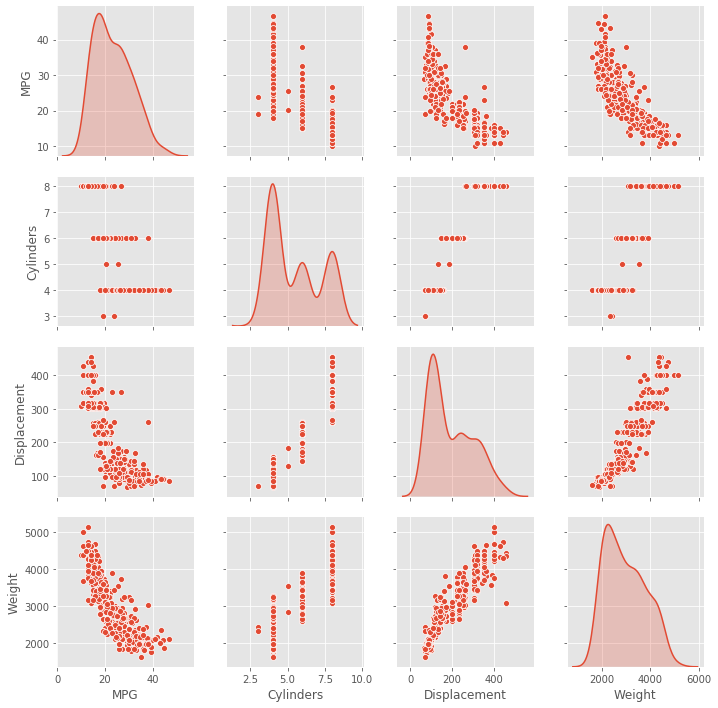

In [0]:
sns.pairplot(training_df[['MPG', 'Cylinders', 'Displacement', 'Weight']], diag_kind='kde')
plt.show()

In [0]:
display(training_df.head())
display(testing_df.head())

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model-Year,USA,Europe,Japan
157,15.0,8,350.0,145.0,4440.0,14.0,75,1.0,0.0,0.0
363,22.4,6,231.0,110.0,3415.0,15.8,81,1.0,0.0,0.0
328,30.0,4,146.0,67.0,3250.0,21.8,80,0.0,1.0,0.0
319,31.3,4,120.0,75.0,2542.0,17.5,80,0.0,0.0,1.0
148,26.0,4,116.0,75.0,2246.0,14.0,74,0.0,1.0,0.0


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model-Year,USA,Europe,Japan
47,19.0,6,250.0,100.0,3282.0,15.0,71,1.0,0.0,0.0
102,26.0,4,97.0,46.0,1950.0,21.0,73,0.0,1.0,0.0
111,18.0,3,70.0,90.0,2124.0,13.5,73,0.0,0.0,1.0
179,22.0,4,121.0,98.0,2945.0,14.5,75,0.0,1.0,0.0
49,23.0,4,122.0,86.0,2220.0,14.0,71,1.0,0.0,0.0


In [0]:
training_features = training_df.copy()
testing_features = testing_df.copy()

training_labels = training_features.pop('MPG')
testing_labels = testing_features.pop('MPG')

print("Training Features : ")
display(training_features.head())
print("Training Labels : ")
display(training_labels.head())
print("Training Features Shape : {}".format(training_features.shape))
print("Training Labels Shape : {}".format(training_labels.shape))

print("\nTesting Features : ")
display(testing_features.head())
print("Testing Labels : ")
display(testing_labels.head())

Training Features : 


,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model-Year,USA,Europe,Japan
157,8,350.0,145.0,4440.0,14.0,75,1.0,0.0,0.0
363,6,231.0,110.0,3415.0,15.8,81,1.0,0.0,0.0
328,4,146.0,67.0,3250.0,21.8,80,0.0,1.0,0.0
319,4,120.0,75.0,2542.0,17.5,80,0.0,0.0,1.0
148,4,116.0,75.0,2246.0,14.0,74,0.0,1.0,0.0


Training Labels : 


157    15.0
363    22.4
328    30.0
319    31.3
148    26.0
Name: MPG, dtype: float64

Training Features Shape : (333, 9)
Training Labels Shape : (333,)

Testing Features : 


,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model-Year,USA,Europe,Japan
47,6,250.0,100.0,3282.0,15.0,71,1.0,0.0,0.0
102,4,97.0,46.0,1950.0,21.0,73,0.0,1.0,0.0
111,3,70.0,90.0,2124.0,13.5,73,0.0,0.0,1.0
179,4,121.0,98.0,2945.0,14.5,75,0.0,1.0,0.0
49,4,122.0,86.0,2220.0,14.0,71,1.0,0.0,0.0


Testing Labels : 


47     19.0
102    26.0
111    18.0
179    22.0
49     23.0
Name: MPG, dtype: float64

In [0]:
training_feat_stats = training_features.describe()
training_feat_stats = training_feat_stats.transpose()
training_feat_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,333.0,5.501502,1.698023,3.0,4.0,4.0,8.0,8.0
Displacement,333.0,195.704204,103.344160,68.0,105.0,151.0,267.0,455.0
Horsepower,333.0,104.417417,37.610599,46.0,76.0,95.0,125.0,230.0
Weight,333.0,2982.951952,817.931102,1613.0,2245.0,2855.0,3613.0,5140.0
Acceleration,333.0,15.581982,2.808191,8.0,13.8,15.5,17.3,24.8
Model-Year,333.0,76.045045,3.661228,70.0,73.0,76.0,79.0,82.0
USA,333.0,0.636637,0.481692,0.0,0.0,1.0,1.0,1.0
Europe,333.0,0.171171,0.377225,0.0,0.0,0.0,0.0,1.0
Japan,333.0,0.192192,0.394616,0.0,0.0,0.0,0.0,1.0


### Normalizing
We do `z-score` normalization to normalize each feature in the dataset.

In [0]:
def z_score_normalization(x):
  return (training_feat_stats['mean'] - x) / training_feat_stats['std']

In [0]:
normed_train_features = z_score_normalization(training_features)
normed_test_features = z_score_normalization(testing_features)

display(normed_train_features.head(10))
display(normed_test_features.head(10))

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model-Year,USA,Europe,Japan
157,-1.471416,-1.493029,-1.079020,-1.781382,0.563345,0.285436,-0.754348,0.453764,0.487036
363,-0.293576,-0.341536,-0.148431,-0.528221,-0.077636,-1.353359,-0.754348,0.453764,0.487036
328,0.884265,0.480958,0.994864,-0.326492,-2.214243,-1.080226,1.321667,-2.197172,0.487036
319,0.884265,0.732545,0.782158,0.539106,-0.683008,-1.080226,1.321667,0.453764,-2.047072
148,0.884265,0.771250,0.782158,0.900995,0.563345,0.558568,1.321667,-2.197172,0.487036
186,0.884265,0.916396,0.569452,0.954789,0.100414,0.012303,1.321667,-2.197172,0.487036
214,-1.471416,-1.028561,-0.680196,-1.084502,0.207244,0.012303,-0.754348,0.453764,0.487036
83,0.884265,0.945426,0.649216,1.001248,0.207244,1.104833,-0.754348,0.453764,0.487036
321,0.884265,0.848661,0.782158,0.877766,0.136024,-1.080226,1.321667,0.453764,-2.047072
293,0.884265,1.032513,0.888511,1.293449,0.563345,-0.807094,1.321667,-2.197172,0.487036


,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model-Year,USA,Europe,Japan
47,-0.293576,-0.525388,0.117451,-0.365615,0.207244,1.377965,-0.754348,0.453764,0.487036
102,0.884265,0.955102,1.553217,1.262884,-1.929362,0.831700,1.321667,-2.197172,0.487036
111,1.473185,1.216365,0.383334,1.050152,0.741396,0.831700,1.321667,0.453764,-2.047072
179,0.884265,0.722868,0.170628,0.046400,0.385295,0.285436,1.321667,-2.197172,0.487036
49,0.884265,0.713192,0.489687,0.932783,0.563345,1.377965,-0.754348,0.453764,0.487036
177,0.884265,0.780927,0.250393,0.353272,0.207244,0.285436,1.321667,-2.197172,0.487036
383,0.884265,1.013160,0.994864,1.244545,0.207244,-1.626491,1.321667,0.453764,-2.047072
129,0.884265,1.129277,0.994864,1.262884,-1.217160,0.558568,1.321667,0.453764,-2.047072
95,-1.471416,-2.509051,-3.206080,-2.406129,1.631649,0.831700,-0.754348,0.453764,0.487036
123,-0.293576,0.384194,-0.467490,0.215118,0.741396,0.831700,1.321667,0.453764,-2.047072


In [0]:
display(training_df.head())
display(testing_df.head())

display(training_features.head())
display(testing_features.head())

display(normed_train_features.head())
display(normed_test_features.head())

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model-Year,USA,Europe,Japan
157,15.0,8,350.0,145.0,4440.0,14.0,75,1.0,0.0,0.0
363,22.4,6,231.0,110.0,3415.0,15.8,81,1.0,0.0,0.0
328,30.0,4,146.0,67.0,3250.0,21.8,80,0.0,1.0,0.0
319,31.3,4,120.0,75.0,2542.0,17.5,80,0.0,0.0,1.0
148,26.0,4,116.0,75.0,2246.0,14.0,74,0.0,1.0,0.0


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model-Year,USA,Europe,Japan
47,19.0,6,250.0,100.0,3282.0,15.0,71,1.0,0.0,0.0
102,26.0,4,97.0,46.0,1950.0,21.0,73,0.0,1.0,0.0
111,18.0,3,70.0,90.0,2124.0,13.5,73,0.0,0.0,1.0
179,22.0,4,121.0,98.0,2945.0,14.5,75,0.0,1.0,0.0
49,23.0,4,122.0,86.0,2220.0,14.0,71,1.0,0.0,0.0


,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model-Year,USA,Europe,Japan
157,8,350.0,145.0,4440.0,14.0,75,1.0,0.0,0.0
363,6,231.0,110.0,3415.0,15.8,81,1.0,0.0,0.0
328,4,146.0,67.0,3250.0,21.8,80,0.0,1.0,0.0
319,4,120.0,75.0,2542.0,17.5,80,0.0,0.0,1.0
148,4,116.0,75.0,2246.0,14.0,74,0.0,1.0,0.0


,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model-Year,USA,Europe,Japan
47,6,250.0,100.0,3282.0,15.0,71,1.0,0.0,0.0
102,4,97.0,46.0,1950.0,21.0,73,0.0,1.0,0.0
111,3,70.0,90.0,2124.0,13.5,73,0.0,0.0,1.0
179,4,121.0,98.0,2945.0,14.5,75,0.0,1.0,0.0
49,4,122.0,86.0,2220.0,14.0,71,1.0,0.0,0.0


,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model-Year,USA,Europe,Japan
157,-1.471416,-1.493029,-1.079020,-1.781382,0.563345,0.285436,-0.754348,0.453764,0.487036
363,-0.293576,-0.341536,-0.148431,-0.528221,-0.077636,-1.353359,-0.754348,0.453764,0.487036
328,0.884265,0.480958,0.994864,-0.326492,-2.214243,-1.080226,1.321667,-2.197172,0.487036
319,0.884265,0.732545,0.782158,0.539106,-0.683008,-1.080226,1.321667,0.453764,-2.047072
148,0.884265,0.771250,0.782158,0.900995,0.563345,0.558568,1.321667,-2.197172,0.487036


,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model-Year,USA,Europe,Japan
47,-0.293576,-0.525388,0.117451,-0.365615,0.207244,1.377965,-0.754348,0.453764,0.487036
102,0.884265,0.955102,1.553217,1.262884,-1.929362,0.831700,1.321667,-2.197172,0.487036
111,1.473185,1.216365,0.383334,1.050152,0.741396,0.831700,1.321667,0.453764,-2.047072
179,0.884265,0.722868,0.170628,0.046400,0.385295,0.285436,1.321667,-2.197172,0.487036
49,0.884265,0.713192,0.489687,0.932783,0.563345,1.377965,-0.754348,0.453764,0.487036


### Build the Model

In [0]:
def build_model():
  model = keras.Sequential([
    layers.Dense(units=64, 
                 activation=tf.nn.relu, 
                 input_shape=[len(normed_train_features.keys())]),
    layers.Dense(units=64, 
                 activation=tf.nn.relu),
    layers.Dense(units=1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)

  model.compile(loss='mse', 
                optimizer=optimizer, 
                metrics=['mae', 'mse'])
  return model

In [0]:
model = build_model()

In [0]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                640       
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


### Training the Model

In [0]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print(".", end='')

EPOCHS = 1000

history = model.fit(normed_train_features, 
                    training_labels, 
                    epochs=EPOCHS, 
                    validation_split=0.2, 
                    verbose=0, 
                    callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [0]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,1.992749,0.935679,1.992749,9.106486,2.101741,9.106485,995
996,2.031187,0.981581,2.031187,8.563234,2.054701,8.563234,996
997,1.824539,0.907656,1.824540,8.615457,2.069261,8.615458,997
998,1.859955,0.952345,1.859956,9.083152,2.150222,9.083153,998
999,2.078065,0.965684,2.078065,8.493366,2.014623,8.493365,999


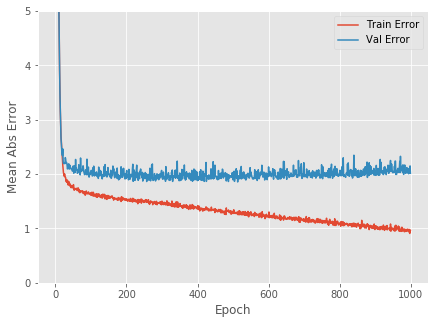

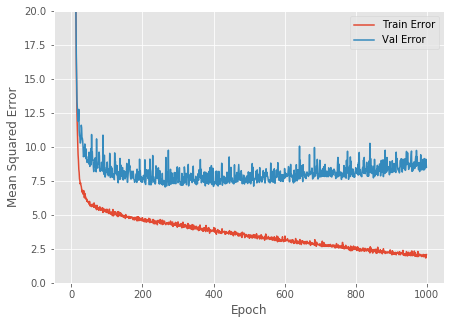

In [0]:
def plot_model_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure(figsize=(7, 5))
  plt.xlabel("Epoch")
  plt.ylabel("Mean Abs Error")
  plt.plot(hist['epoch'], hist['mae'], label="Train Error")
  plt.plot(hist['epoch'], hist['val_mae'], label="Val Error")
  plt.ylim([0, 5])
  plt.legend()

  plt.figure(figsize=(7, 5))
  plt.xlabel("Epoch")
  plt.ylabel("Mean Squared Error")
  plt.plot(hist['epoch'], hist['mse'], label="Train Error")
  plt.plot(hist['epoch'], hist['val_mse'], label="Val Error")
  plt.ylim([0, 20])
  plt.legend()

  plt.show()

plot_model_history(history)


.......................................................................................

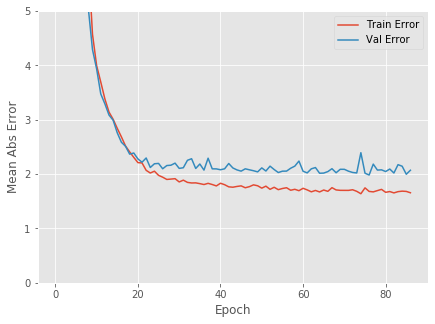

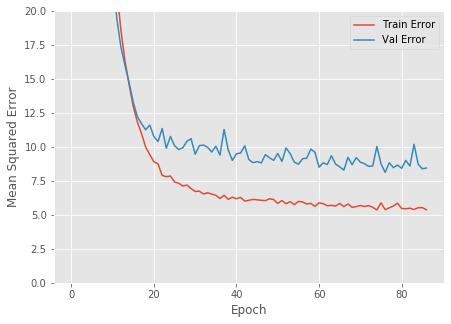

In [0]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_features, 
                    training_labels, 
                    epochs=EPOCHS, 
                    validation_split=0.2, 
                    verbose=0, 
                    callbacks=[early_stop, PrintDot()])

plot_model_history(history=history)

In [0]:
loss, mae, mse = model.evaluate(normed_test_features, 
                                testing_labels, verbose=2)

print("Loss : {:.2f}".format(loss))
print("MAE : {:.2f}".format(mae))
print("MSE : {:.2f}".format(mse))

59/59 - 0s - loss: 10.3895 - mae: 2.3331 - mse: 10.3895
Loss : 10.39
MAE : 2.33
MSE : 10.39


[17.866879 31.926521 29.894491 22.268122 26.449688 23.678019 39.840485
 32.497368 13.064526 20.010336 13.73242  22.608463 12.465669 18.09687
 35.84407  33.02106  26.18284  35.774582 12.916125 29.455257 31.068035
 23.81095  19.194672 13.54927  21.497982 40.623272 32.991108 26.819899
 26.33548  30.334913 26.259203 20.20385  30.275345 13.578823 20.471521
 31.128454 13.243467 35.581863 23.826797 39.720676 13.201427 15.019834
 29.290453 11.631799 31.825708 26.87129  42.44356  28.025597 14.297106
 30.993052 25.265926 13.868532 14.587256 22.837326 16.607079 31.191578
 25.720432 38.03889  14.049479] 



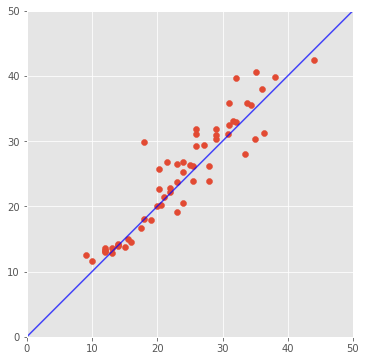

In [0]:
test_predictions = model.predict(normed_test_features).flatten()
print(test_predictions, "\n")

lim = [0, 50]
plt.figure(figsize=(8, 6))
plt.axes(aspect="equal")
plt.scatter(testing_labels, test_predictions)
plt.xlim(lim)
plt.ylim(lim)
plt.plot(lim, lim, color='b', alpha=0.7)
plt.show()

### Errors

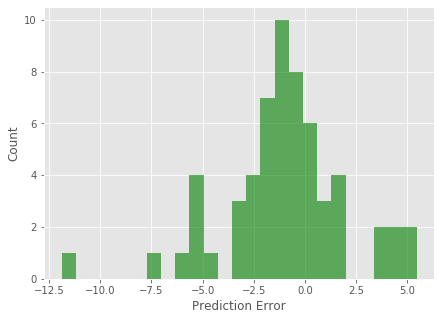

In [0]:
errors = testing_labels - test_predictions
plt.figure(figsize=(7, 5))
plt.hist(errors, bins=25, color='g', alpha=0.6)
plt.xlabel("Prediction Error")
plt.ylabel("Count")
plt.show()

### Little Exploration

[10.20745715 10.20364917 10.17793552 10.27368055 10.27667733 10.35267648
 10.27997118 10.14652298 10.22830475 10.24162517 10.31605639 10.18388182
 10.00142227 10.19768156 10.34878891 10.27019544 10.08351034 10.32632422
 10.33608503 10.17393555 10.06766198 10.14103704 10.38790951 10.10897181
 10.29158139 10.24437982 10.17128649 10.18174521 10.14480469 10.04859442
 10.32081658 10.11174712 10.17152472 10.1179053  10.34562628 10.16264777
 10.21907865 10.18301635 10.31294523 10.1594949  10.28022434 10.3657118
 10.35423962 10.10618025 10.20316307 10.32553817 10.04623128 10.36301932
 10.34843241 10.23545149 10.29447287 10.03195882 10.09727637 10.01868404
 10.12309729 10.18981648 10.33630579 10.30826003 10.04029482 10.05302274
 10.39200385 10.05180996 10.36370591 10.10462497 10.27561582 10.30670926
 10.19142415 10.10016795 10.06500066 10.29406208 10.05241958 10.39165118
 10.21467348 10.17414782 10.12053455 10.11119671 10.27011716 10.32281707
 10.39504033 10.12171866 10.04485815 10.38201138 10.

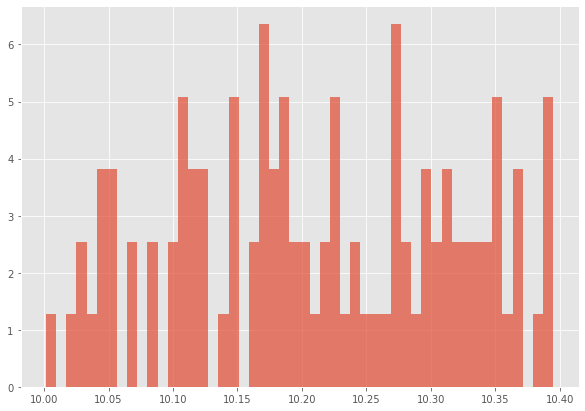

In [0]:
mean, std = 10, .4

x_s = np.random.rand(100) * std + mean
print(x_s)

plt.figure(figsize=(10, 7))
plt.hist(x_s, 50, alpha=0.7, density=True)
plt.show()